# Spotify Wrapped

In [31]:
import pandas as pd
import pytz #for adding timezone

# helper functions tored in utils
import sys
sys.path.append('../utils')  # when using utils within notebooks
from utils import utils

# from datetime import datetime

## 1️⃣ Import Data

Update the `parent_folder` with the location of your unzipped Spotify data

example: `/Users/yourname/Downloads/Spotify Extended Streaming History/`

In [ ]:
# Specifiy where your folder of JSON files is
parent_folder = "/path/to/your/Downloads/Spotify Extended Streaming History/"

year=2025

# call helper function to import all the files into one dataframe
df = utils.import_streaming_data(parent_folder)

print("inspect first 2 records:")
df.head(2)

## 2️⃣ Preprocessing

* 🕰️ Convert to Timestamp & Localise the time
* 📅 Set cutoff date as Nov 15
* ⏱️ Only include songs played for 30 seconds or more

In [33]:
#this is the Date and time (in UTC) of when the stream ended
#convert to datetime
df['ts'] = pd.to_datetime(df['ts'], format="%Y-%m-%dT%H:%M:%SZ", utc=True)

#localise
my_tz = pytz.timezone("Australia/Sydney")
df['ts'] = df['ts'].dt.tz_convert(my_tz) #convert timezone

#sort data in chronological order
df.sort_values(by='ts', inplace=True)

#reduce just to this year and set cutoff date
df = df[df['ts'].dt.year == year]

#set cutoff date
cutoff_date = pd.to_datetime(str(year)+'-11-15 23:59').tz_localize('Australia/Sydney')
df = df[df['ts']<cutoff_date]

# IMPORTANT
# Spotify doesn't count song played for less than 30 seconds
# filter dataframe to songs played >= 30 seconds (30000 ms)
df = df[df['ms_played']>=30000]

#filter out podcasts; a null episode =? its a song
df = df[df['spotify_episode_uri'].isnull()]

# Begin Spotify Wrapped!

We'll make use of the helper functions in our utils file to make our code more modular and readable

In [34]:
num_streams = len(df)
num_unique_songs_played = df.groupby(['artist', 'song'])['song'].nunique().sum()

print("In {}, you played {} songs. Your total stream count is: {}".format(str(year),num_unique_songs_played, num_streams))

In 2025, you played 2906 songs. Your total stream count is: 9717


# ✨ Number 1 Song

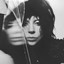

Your top song was 'Garden Of Eden' by Lady Gaga. 
You played it 82 times, starting on 2025-03-07


In [35]:
top_song=utils.get_top_n_songs(df, n=1)
top_song_artist = top_song['artist'].values.tolist()[0]
top_song_song = top_song['song'].values.tolist()[0]
top_song_playcount=top_song['count'].values.tolist()[0]
top_song_image=top_song['image_url'].values.tolist()[0]
top_song_startdate = df[(df['artist']==top_song_artist) &
                                      (df['song']==top_song_song)].sort_values(by='ts').head(1).iloc[0]['ts'].date()

utils.display_image_from_url(top_song_image)
print("Your top song was '{title}' by {artist}. \nYou played it {playcount} times, starting on {start_date}".format(title=top_song_song,
                                                                                                                  artist=top_song_artist,
                                                                                                                  playcount=top_song_playcount,
                                                                                                                  start_date=top_song_startdate))



# ✨ Top 5 Songs

In [36]:
utils.display_images_in_dataframe(utils.get_top_n_songs(df, 5), scale=1)

,artist,song,count,image
1,Lady Gaga,Garden Of Eden,82,
2,Lady Gaga,Abracadabra,72,
3,Lady Gaga,Vanish Into You,68,
4,KATSEYE,Gameboy,67,
5,BLACKPINK,JUMP,67,


# ✨ Number 1 Artist

In [37]:
num_unique_artists = len(df['artist'].unique())
print("You listened to {} artists this year, but once came out on top".format(num_unique_artists))

You listened to 925 artists this year, but once came out on top


Say hello to your top artist: Lady Gaga


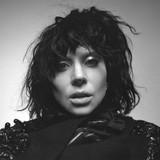

You spent 3005 minutes listening


In [38]:
#get the number one most played artist
top_artist = utils.get_top_n_artists(df, 1)
top_artist_artist = top_artist['artist'].values.tolist()[0]
top_artist_image = top_artist['image_url'].values.tolist()[0]
top_artist_mins = int(df[df['artist']==top_artist_artist]['ms_played'].sum()/1000/60)

print("Say hello to your top artist: {}".format(top_artist_artist))
utils.display_image_from_url(top_artist_image)
print("You spent {} minutes listening".format(top_artist_mins))

# ✨ Top 5 Artists

In [39]:
utils.display_images_in_dataframe(utils.get_top_n_artists(df, n=5), scale=0.4)

,artist,count,image
1,Lady Gaga,855,
2,Taylor Swift,656,
3,Addison Rae,352,
4,KATSEYE,317,
5,Bad Bunny,315,


# ✨ Minutes Listening

In [40]:
mins_listening = int(df['ms_played'].sum()/1000/60)
print("Minutes Listening:",mins_listening,"(that's ~{} days!)".format(int(mins_listening/60/24)))

Minutes Listening: 29605 (that's ~20 days!)
